In [1]:
!pip install ultralytics opencv-python --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.1 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Path to the zip file in Google Drive
zip_file = '/content/drive/MyDrive/Car Damage Detection.v4i.yolov8.zip'




In [5]:
import zipfile

zip_file = '/content/drive/MyDrive/Car Damage Detection.v4i.yolov8.zip'
extract_folder = '/content/drive/MyDrive/extracted/'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extraction complete!")


KeyboardInterrupt: 

In [6]:
import os
from glob import glob

base_path = '/content/drive/MyDrive/extracted'  # change to your actual extraction folder

train_images = glob(os.path.join(base_path, 'train/images/*.jpg'))
val_images = glob(os.path.join(base_path, 'valid/images/*.jpg'))
test_images = glob(os.path.join(base_path, 'test/images/*.jpg'))

print(f"Train images: {len(train_images)}")
print(f"Validation images: {len(val_images)}")
print(f"Test images: {len(test_images)}")


Train images: 6800
Validation images: 836
Test images: 123


In [7]:
import yaml

yaml_path = os.path.join(base_path, "/content/drive/MyDrive/extracted/data.yaml")

with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

print(data_yaml)


{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 7, 'names': ['Bonnet', 'Bumper', 'Dickey', 'Door', 'Fender', 'Light', 'Windshield'], 'roboflow': {'workspace': 'capstone-nh0nc', 'project': 'car-damage-detection-t0g92', 'version': 4, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/capstone-nh0nc/car-damage-detection-t0g92/dataset/4'}}


In [8]:
import os
from glob import glob

base_path = "/content/drive/MyDrive/extracted"  # change this if needed

for split in ["train", "valid", "test"]:
    img_dir = os.path.join(base_path, split, "images")
    lbl_dir = os.path.join(base_path, split, "labels")

    img_count = len(glob(f"{img_dir}/*.jpg")) + len(glob(f"{img_dir}/*.png"))
    lbl_count = len(glob(f"{lbl_dir}/*.txt"))

    print(f"{split.capitalize()} -> Images: {img_count}, Labels: {lbl_count}")


Train -> Images: 6800, Labels: 6800
Valid -> Images: 836, Labels: 836
Test -> Images: 123, Labels: 123


In [9]:
model = YOLO('yolov8n.pt')  # Use yolov8s.pt or yolov8m.pt for better accuracy

100%|██████████| 6.25M/6.25M [00:00<00:00, 336MB/s]


In [ ]:
model = YOLO("/content/drive/MyDrive/yolov8_training_results/car_damage_yolov8_model_optimized/weights/last.pt")


In [ ]:
results = model.train(
    data="/content/drive/MyDrive/extracted/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    name="car_damage_yolov8_model_optimized",
    project="/content/drive/MyDrive/yolov8_training_results",
    save=True,
    save_period=1,
    patience=10,
    val=True,
    verbose=True,
    augment=True,  # <--- Ensure this is enabled
    mosaic=1.0,    # <--- Enable Mosaic (0.0 to 1.0)
    mixup=0.2      # <--- MixUp (optional, helps generalize)
)


In [10]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolov8_training_results/car_damage_yolov8_model_optimized6/weights/best.pt")


In [11]:
results = model.predict("/content/drive/MyDrive/17142694_web1_190504-BPD-heregott-1-1024x683.jpg", save=True, conf=0.25)



image 1/1 /content/drive/MyDrive/17142694_web1_190504-BPD-heregott-1-1024x683.jpg: 448x640 1 Bumper, 33.7ms
Speed: 14.9ms preprocess, 33.7ms inference, 325.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


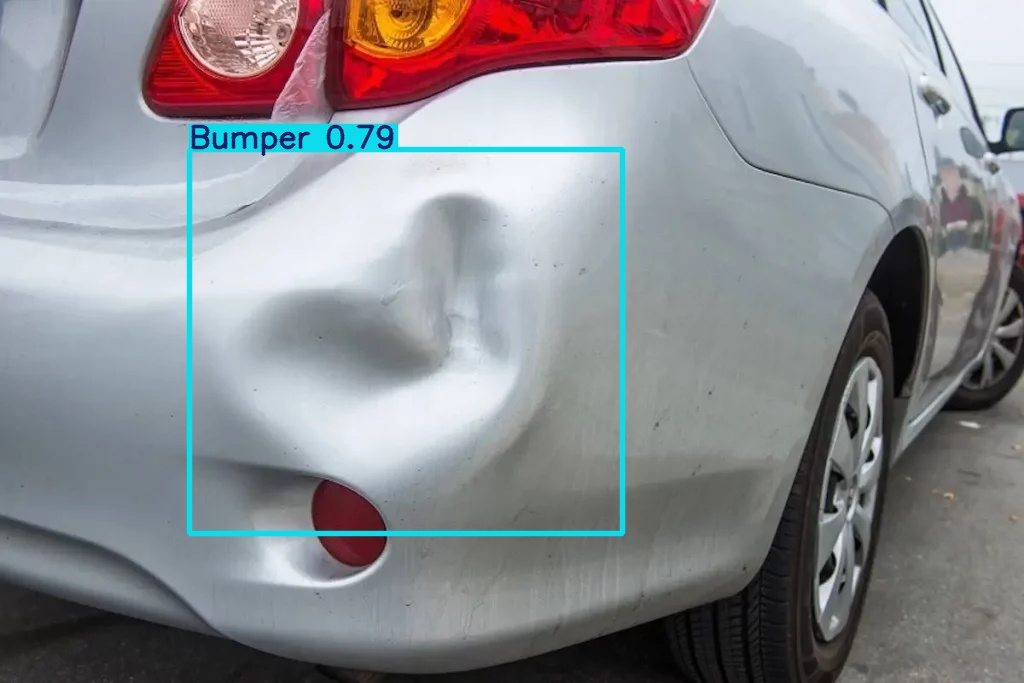

In [12]:
from IPython.display import Image

Image(filename='/content/runs/detect/predict/17142694_web1_190504-BPD-heregott-1-1024x683.jpg')


In [ ]:
results = model.predict(source="/content/SIDE-Damage.jpg", save=True, conf=0.25)

In [ ]:
from IPython.display import Image

Image(filename='')

In [14]:
results = model.predict(source="/content/drive/MyDrive/istockphoto-172181182-612x612.jpg", save=True, conf=0.25)


image 1/1 /content/drive/MyDrive/istockphoto-172181182-612x612.jpg: 448x640 2 Doors, 9.7ms
Speed: 3.6ms preprocess, 9.7ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


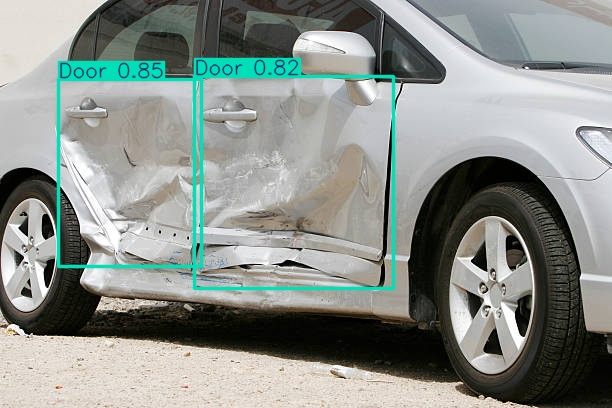

In [15]:
from PIL import Image as PILImage
from IPython.display import display

# Open and convert .webp to displayable format
img = PILImage.open("/content/runs/detect/predict/istockphoto-172181182-612x612.jpg").convert("RGB")
display(img)


In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/yolov8_training_results/car_damage_yolov8_model_optimized5/weights/best.pt")

# Run validation
metrics = model.val()

# Print evaluation metrics
print(metrics)


In [17]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolov8_training_results/car_damage_yolov8_model_optimized6/weights/last.pt")















In [18]:
print(model.val())

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 6.0±1.6 MB/s, size: 7.9 KB)


val: Scanning /content/drive/MyDrive/valid/labels.cache... 836 images, 4 backgrounds, 0 corrupt: 100%|██████████| 836/836 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1103, len(boxes) = 1586. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:13<00:00,  4.08it/s]


                   all        836       1586      0.604      0.536      0.524      0.266
                Bonnet        172        175      0.646      0.594      0.594      0.303
                Bumper        471        480      0.614      0.635      0.585       0.26
                Dickey         64         64      0.582      0.375      0.421      0.185
                  Door        199        231      0.564      0.485       0.47      0.186
                Fender        295        306      0.427      0.405      0.342      0.144
                 Light        206        226      0.574        0.5      0.459      0.202
            Windshield        104        104      0.823       0.76      0.798      0.583
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ul

In [20]:
results = model.predict(source="/content/drive/MyDrive/damaged-car-front-after-traffic-accident-2Y059RP.jpg", save=True, conf=0.25)


image 1/1 /content/drive/MyDrive/damaged-car-front-after-traffic-accident-2Y059RP.jpg: 480x640 3 Bumpers, 1 Fender, 1 Light, 39.1ms
Speed: 3.0ms preprocess, 39.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


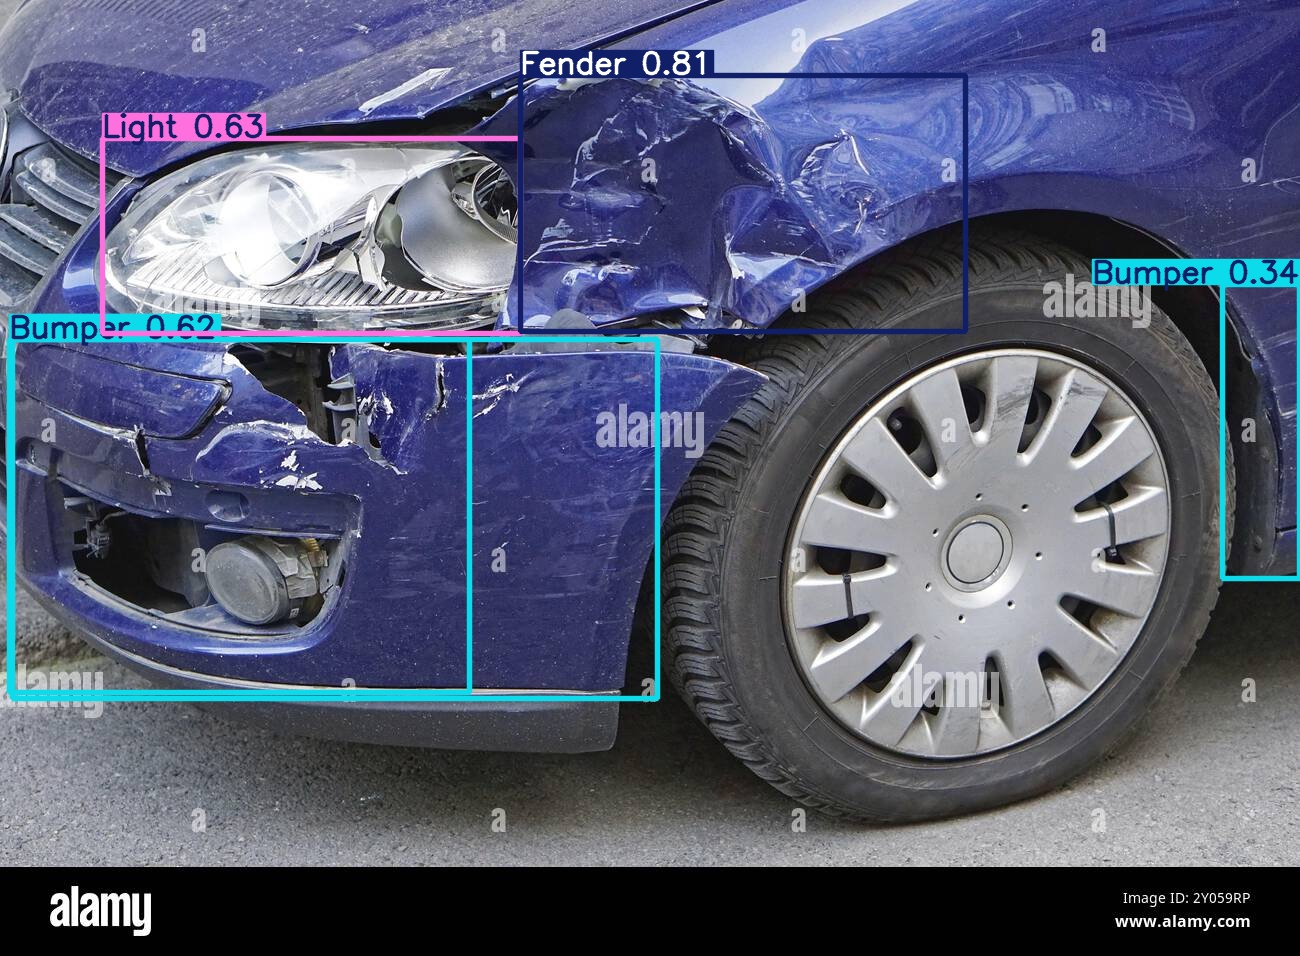

In [21]:
from IPython.display import Image

Image(filename='/content/runs/detect/predict2/damaged-car-front-after-traffic-accident-2Y059RP.jpg')

In [22]:
results = model.predict(source="/content/drive/MyDrive/damaged-blue-car-dents-scratches-600nw-2546680481.webp", save=True, conf=0.25)


image 1/1 /content/drive/MyDrive/damaged-blue-car-dents-scratches-600nw-2546680481.webp: 448x640 1 Door, 1 Fender, 37.5ms
Speed: 2.6ms preprocess, 37.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2


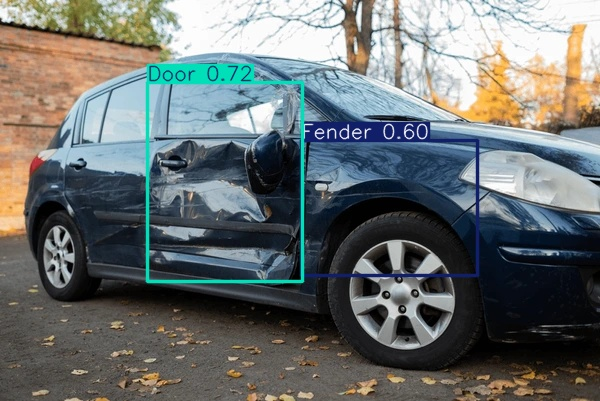

In [23]:
from IPython.display import Image

Image(filename='/content/runs/detect/predict2/damaged-blue-car-dents-scratches-600nw-2546680481.jpg')

In [ ]:
from PIL import Image

im = Image.open("/content/images.jfif")
im.save("image.jpg")


In [ ]:
results = model.predict(source="image.jpg", save=True, conf=0.25)


In [ ]:
from IPython.display import Image

Image(filename='/content/runs/detect/predict/image.jpg')